In [1]:
import pandas as pd
import numpy as np
import os
import json

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
os.getcwd()

'/Users/manish/Documents/pypy'

In [17]:
data_files = os.listdir('../../Downloads/interview/')

In [ ]:
uicycles = pd.read_csv(os.path.join('../../Downloads/interview/', data_files[1]))
eventdump = pd.read_csv(os.path.join('../../Downloads/interview/', data_files[0]))

In [25]:
uicycles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161351 entries, 0 to 161350
Data columns (total 4 columns):
uuid             161349 non-null object
os               161349 non-null object
event_type       161351 non-null object
creation_date    161351 non-null object
dtypes: object(4)
memory usage: 4.9+ MB


In [22]:
eventdump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995304 entries, 0 to 995303
Data columns (total 4 columns):
uuid               995304 non-null object
event              995304 non-null object
event_timestamp    995304 non-null object
properties         995304 non-null object
dtypes: object(4)
memory usage: 30.4+ MB


In [23]:
eventdump.head()

,uuid,event,event_timestamp,properties
0,43e1796c34ac2a91,Cart is viewed,2016-08-29 02:07:56.88,"{""email_id"": ""careers24@gmail.com"", ""timeStamp..."
1,3065bf9960737af,Cart is viewed,2016-08-29 03:04:00.08,"{""email_id"": ""devangnipathak@gmail.com"", ""time..."
2,636677073e9445e3,Search results page viewed,2016-08-29 00:26:23.213,"{""category"": ""Panties"", ""timeStamp"": ""29-08-20..."
3,75f156f9584ffccf,Push notification received,2016-08-29 02:31:20.89,"{""timeStamp"": ""29-08-2016 08:05:40""}"
4,651557edb4a564b0,Search is initiated,2016-08-29 03:12:53.29,"{""search_query"": ""bra for 19 years old "", ""tim..."


In [26]:
uicycles.head()

,uuid,os,event_type,creation_date
0,a9ba6d0cd8586a4f,Android,install,2016-08-06 19:54:47.0
1,7365ac7d0721bbf0,Android,re-install,2016-08-14 16:04:45.0
2,4bf1a1368533ad74,Android,uninstall,2016-08-06 17:40:18.0
3,8f2a30a777e2714b,Android,install,2016-08-31 05:25:24.0
4,cd002b38b452db4c,Android,install,2016-08-20 20:19:06.0


## Customer Retention Trend

In [68]:
# returns the time difference between install(or reinstall) / uninstall 
def get_trend(df):
    
    df = df.sort_values('creation_date').reset_index(drop=True)
    df['retention'] = df['creation_date'] - df['creation_date'].shift(1)
    return df

In [60]:
sample_uuid = uicycles['uuid'].values.tolist()[:100]

In [71]:
rt1 = (uicycles[uicycles['uuid'].isin(sample_uuid)]
 .groupby('uuid', as_index=False)
 .apply(get_trend)
 .reset_index(drop=True))

In [89]:
rt1['retention'] = rt1['retention'].astype('timedelta64[m]')

In [90]:
rt1 = rt1[rt1['retention'].notnull()].reset_index(drop=True)

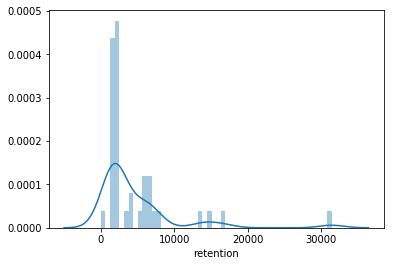

In [93]:
sns.distplot(rt1['retention'],bins=50)

In [99]:
print('The average lifetime value of a customer is {} hours'.format(rt1['retention'].median() / 60))

The average lifetime value of a customer is 35.125 hours


## Active time of the day

In [101]:
uicycles['hour'] = uicycles['creation_date'].dt.hour

In [115]:
active_time = uicycles.groupby('hour')['event_type'].size().reset_index()

In [130]:
max_time = active_time.loc[active_time['event_type'].argmax()].hour

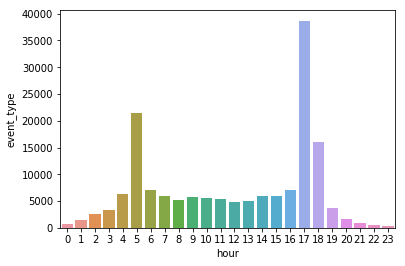

In [120]:
sns.barplot(x= 'hour', y = 'event_type', data=active_time)

In [133]:
print('The most active hour of the day is {} hours i.e 5 pm'.format(max_time))

The most active hour of the day is 17 hours i.e 5 pm


## Purchase value buckets

In [180]:
eventdump['properties'] = [json.loads(x) for x in eventdump['properties'].values.tolist()]

In [181]:
eventdump['cat_value'] = eventdump['properties'].map(lambda x: float(x['Cart Value']) if 'Cart Value' in x else -1)

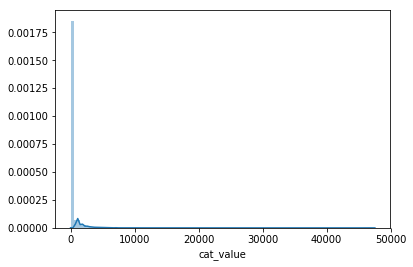

In [185]:
## general trend
sns.distplot(eventdump['cat_value'], bins=100)

In [191]:
eventdump[eventdump['event'].str.contains('Checkout')].cat_value.describe()

count    4138.0
mean       -1.0
std         0.0
min        -1.0
25%        -1.0
50%        -1.0
75%        -1.0
max        -1.0
Name: cat_value, dtype: float64

### There seems to be some issue in data because in all checkout events, the cart_value information is not tracked.

## Purchasing vs Non Purchasing

Need more information here: how to define a purchasing vs non purchasing customers

## Week over week trends

Need more information here: how to define a purchasing customers